## Getting Necessary Imports 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import time

import os, sys, re, pickle, glob
import urllib.request
import zipfile

from IPython.display import Audio
from IPython.display import display as ipython_display
from tqdm import tqdm
import librosa 
import librosa.display

## Understanding our Data - Feature Exploration

In [2]:
#Storing class names in an array ->
class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal']

#Storing source names in array ->
source_names=['acoustic', 'electronic', 'synthetic']

In [3]:
#Printing the class names array ->
class_names

['bass',
 'brass',
 'flute',
 'guitar',
 'keyboard',
 'mallet',
 'organ',
 'reed',
 'string',
 'synth_lead',
 'vocal']

In [4]:
#Picking random wave files from the dataset ->
bass_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/bass_acoustic_000-024-127.wav'
brass_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/brass_acoustic_000-024-075.wav'
flute_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/flute_synthetic_000-022-025.wav'
guitar_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/guitar_acoustic_000-022-075.wav'
keyboard_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/keyboard_acoustic_000-029-075.wav'
mallet_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/mallet_acoustic_000-065-075.wav'
organ_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/organ_acoustic_001-041-127.wav'
reed_file ='/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/reed_acoustic_000-039-025.wav'
string_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/string_acoustic_000-025-050.wav'
synth_lead_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/flute_acoustic_000-055-025.wav'
vocal_file = '/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/dataset-split/nsynth-split/test/audio/vocal_synthetic_000-011-025.wav'

In [5]:
#Creating an array for sample files ->
sample_files = [bass_file, brass_file, flute_file, guitar_file, keyboard_file, 
         mallet_file, organ_file, reed_file, string_file, synth_lead_file, vocal_file]

In [6]:
#Playing a File ->
Audio(guitar_file)

# Feature Extraction

 Waveform and Sampling Rate

In [9]:
# Providing the path 
new_path = "/Users/abhimanyuwadhwa/Desktop/QMUL/MScProject/WAV_Exploration"

# Get a list of files in the new directory
sample_files = [os.path.join(new_path, filename) for filename in os.listdir(new_path)]

y = []
sr = []
for file in sample_files:
    y_out, sr_out = librosa.load(file, sr=None)
    y.append(y_out)
    sr.append(sr_out)
for instrument, y_out, sr_out in zip(class_names, y, sr):
    print("{} has {} samples, and a Sampling Rate of {}".format(instrument, np.size(y_out), sr_out))


bass has 64000 samples, and a Sampling Rate of 16000
brass has 64000 samples, and a Sampling Rate of 16000
flute has 64000 samples, and a Sampling Rate of 16000
guitar has 64000 samples, and a Sampling Rate of 16000
keyboard has 64000 samples, and a Sampling Rate of 16000
mallet has 64000 samples, and a Sampling Rate of 16000
organ has 64000 samples, and a Sampling Rate of 16000
reed has 64000 samples, and a Sampling Rate of 16000
string has 64000 samples, and a Sampling Rate of 16000
synth_lead has 64000 samples, and a Sampling Rate of 16000
vocal has 64000 samples, and a Sampling Rate of 16000


Harmonic and Percussive Component

In [10]:
len(y[0])

64000

In [11]:
y_harmonic = []
y_percussive = []

for sample in y:
    y_harmonic.append(librosa.effects.hpss(sample)[0])
    y_percussive.append(librosa.effects.hpss(sample)[1])

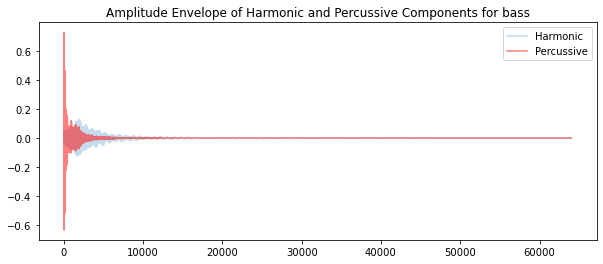

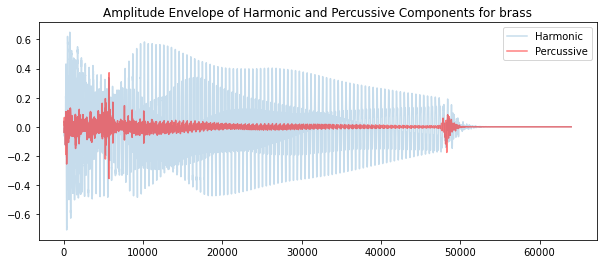

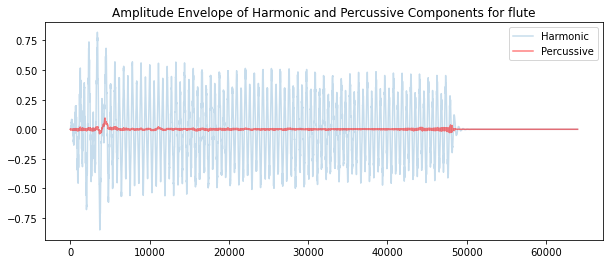

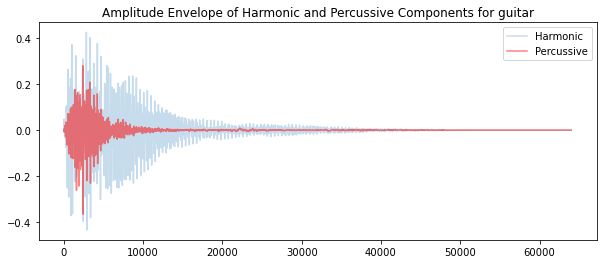

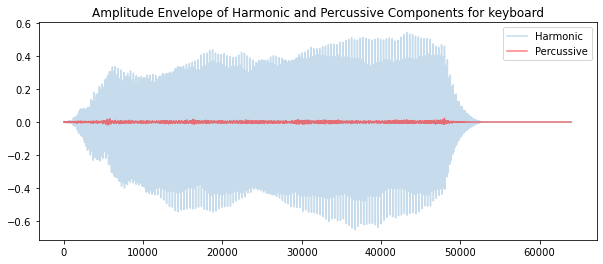

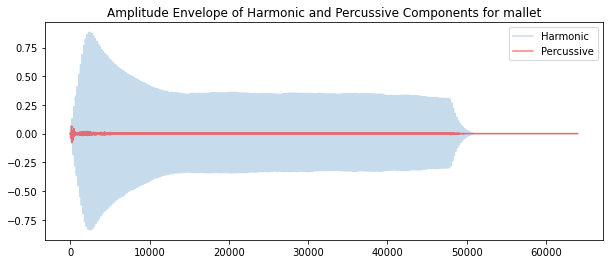

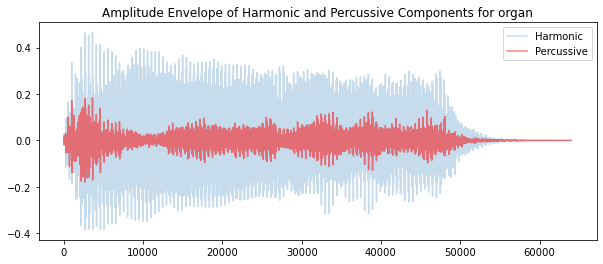

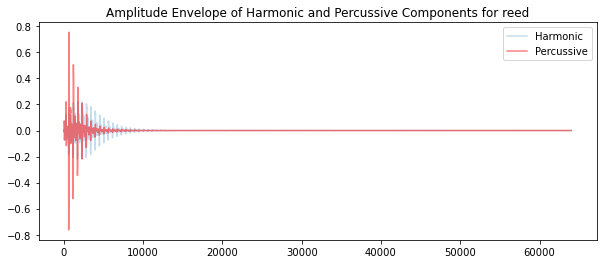

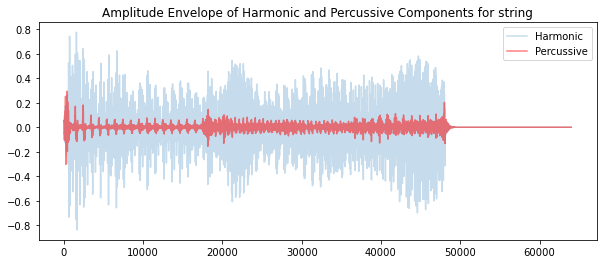

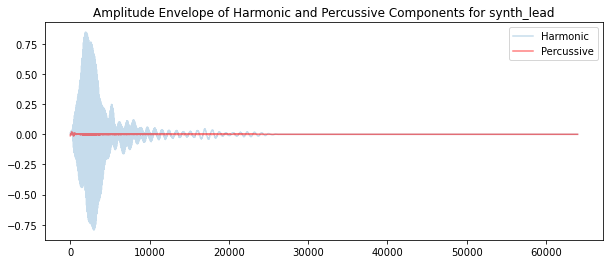

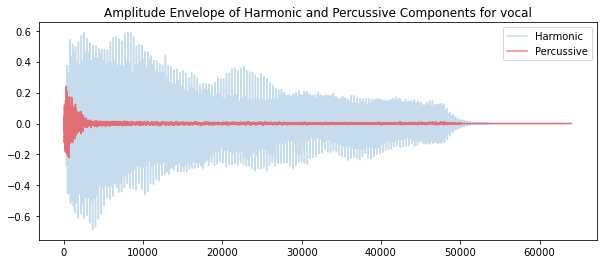

In [12]:
# creating relevant plots -> 
for i, j in enumerate(y):
    plt.figure(figsize = (10, 4))
    plt.plot(y_harmonic[i], alpha = 0.25)
    plt.plot(y_percussive[i], color = 'r', alpha = 0.5)
    plt.legend(['Harmonic', 'Percussive'])
    plt.title("Amplitude Envelope of Harmonic and Percussive Components for " + class_names[i])
    #plt.savefig('plots/soundsAsArrays_' + str(class_names[i]) + '.png')

plt.show()

 Mel Spectrograms 

In [15]:
spectrograms_mel = []

for y_, sr_ in zip(y, sr):
    # Passing through arguments to the Mel filters
    spectrograms_mel.append(librosa.feature.melspectrogram(y = y_, sr = sr_, n_mels = 128,fmax = 8000))

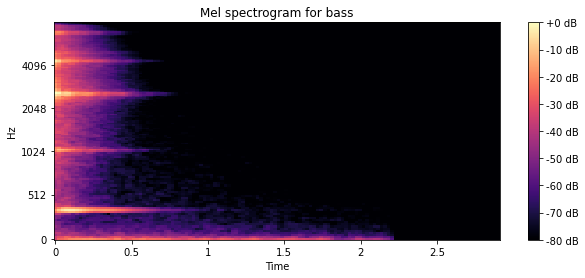

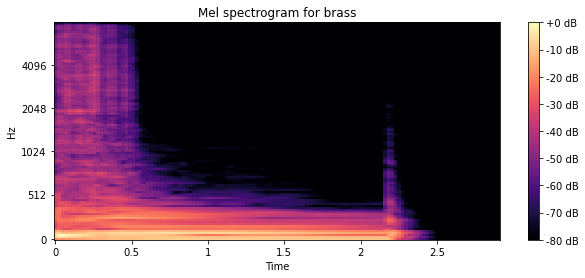

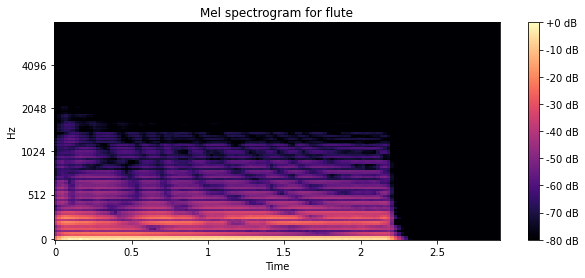

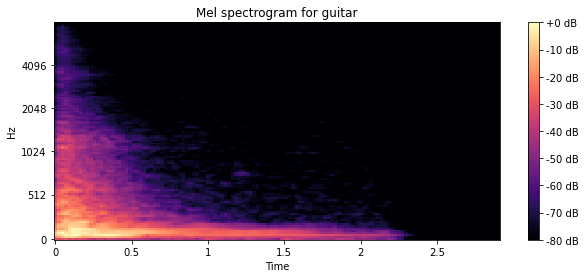

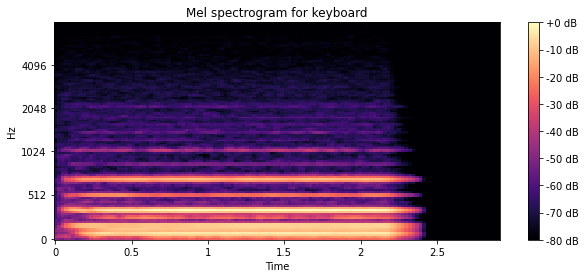

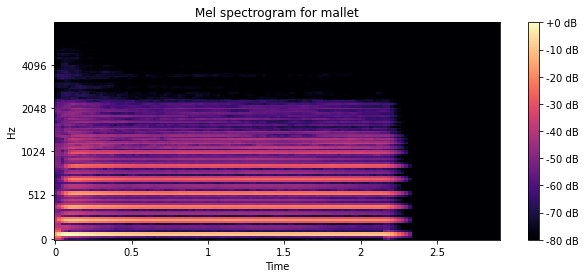

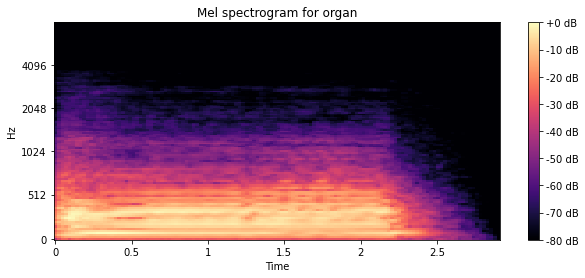

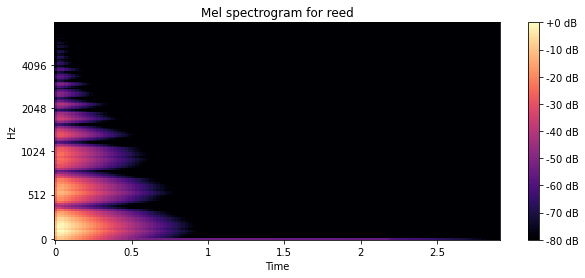

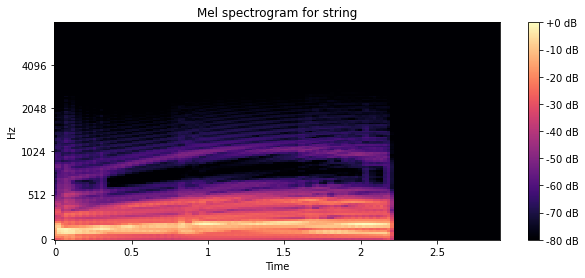

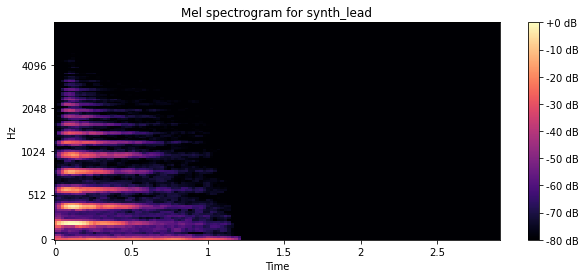

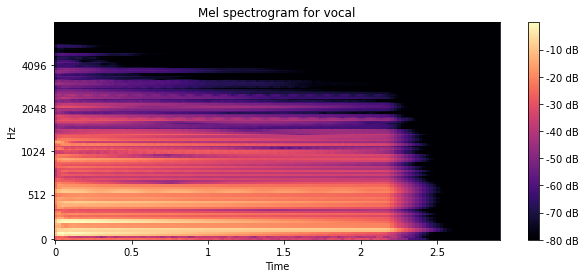

In [16]:
for S, instrument, i in zip(spectrograms_mel,class_names, range(len(class_names))):
    plt.figure(figsize = (10,4))
    librosa.display.specshow(librosa.power_to_db(S,ref = np.max), 
                         y_axis = 'mel', fmax = 8000, x_axis = 'time')
    plt.colorbar(format = '%+2.0f dB')
    plt.title("Mel spectrogram for " + instrument)
    #plt.savefig('plots/mel_spectro_'+str(class_names[i])+'.png')
    
plt.show()

MFCC

In [17]:
mfccs = []
for y_, sr_ in zip(y, sr):
    mfccs.append(librosa.feature.mfcc(y = y_, sr = sr_, n_mfcc = 13))

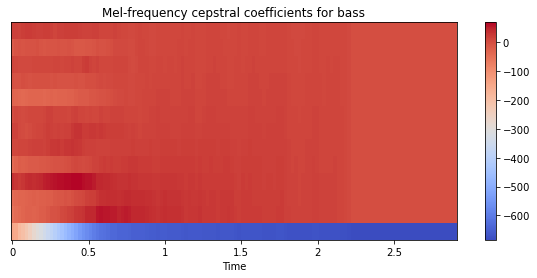

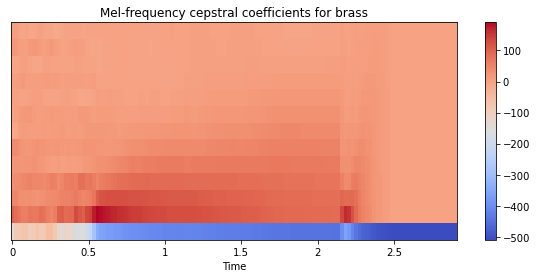

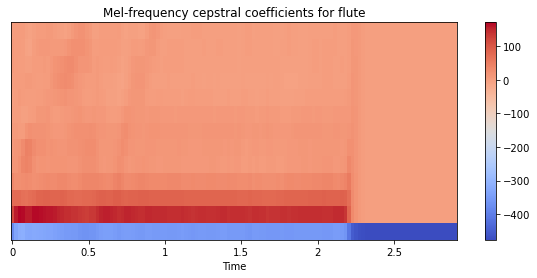

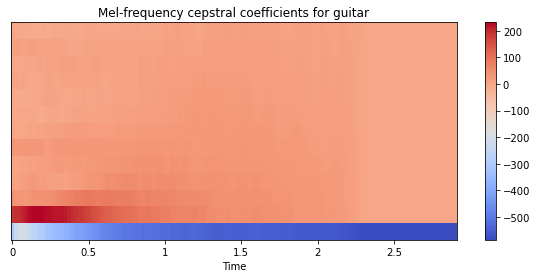

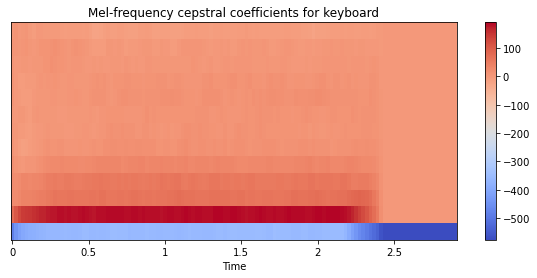

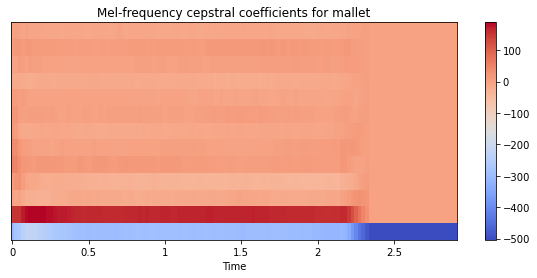

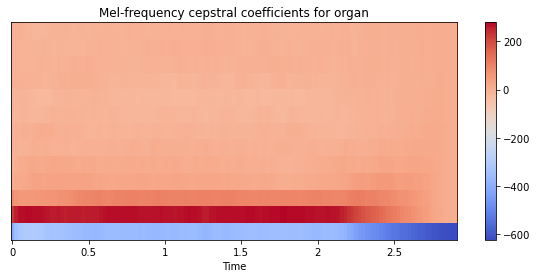

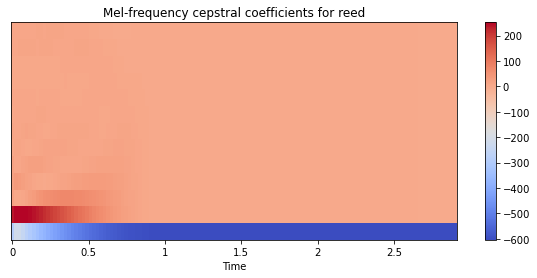

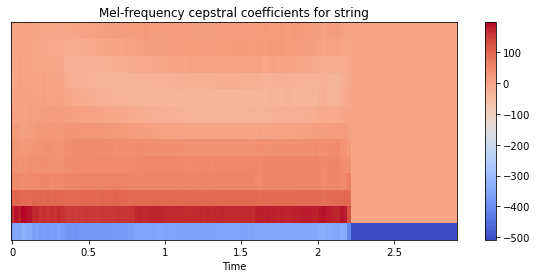

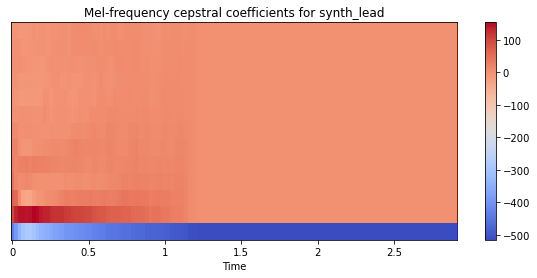

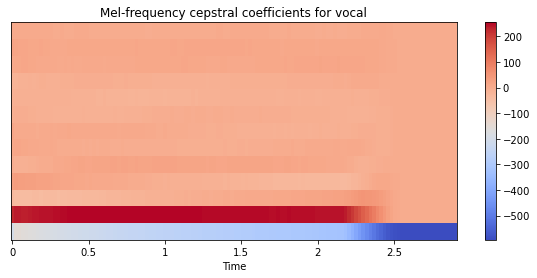

In [18]:
for mfcc, instrument,i in zip(mfccs, class_names, range(len(class_names))):
    plt.figure(figsize = (10,4))
    librosa.display.specshow(mfcc, x_axis = 'time')
    plt.colorbar()
    plt.title('Mel-frequency cepstral coefficients for ' + instrument)
    #plt.savefig('plots/mfcc'+str(class_names[i])+'.png')
plt.show()

Spectral Centroid 

In [19]:
centroids = []
spectrograms = []
phases = []

for y_, sr_ in zip(y, sr):
    centroids.append(librosa.feature.spectral_centroid(y = y_, sr = sr_))
    spectrograms.append(librosa.magphase(librosa.stft(y = y_))[0])
    phases.append(librosa.magphase(librosa.stft(y = y_))[1])

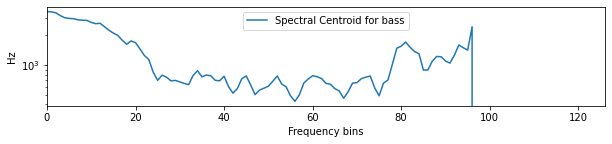

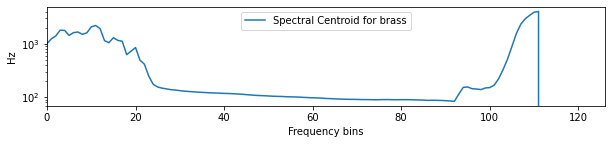

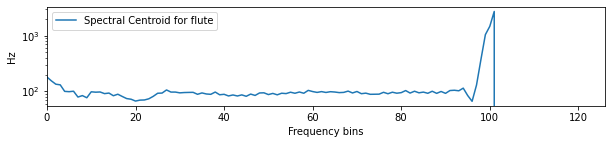

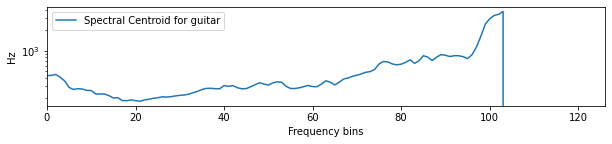

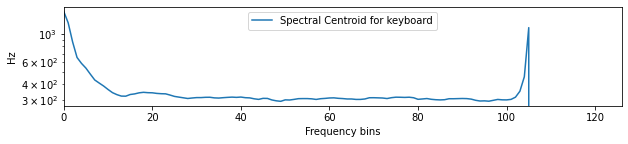

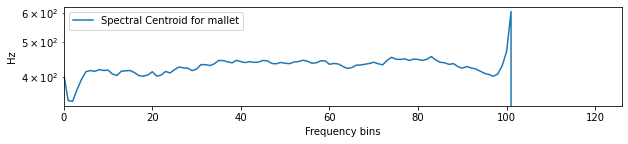

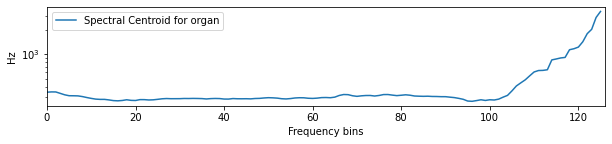

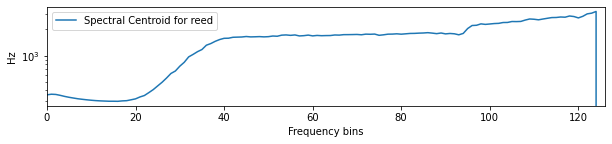

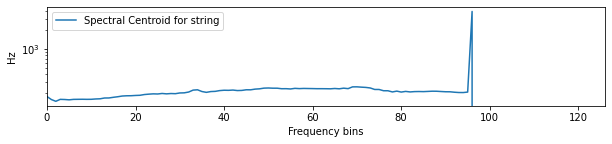

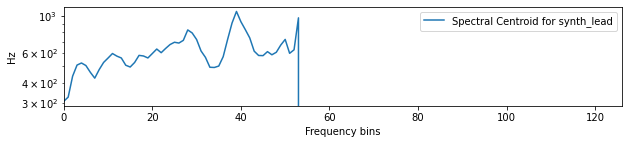

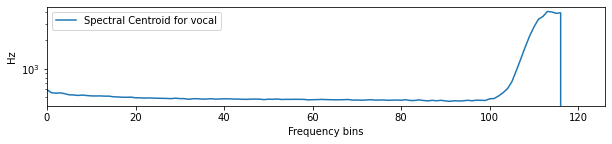

In [20]:
#Making a plot with log scaling on the y axis ->
for C, instrument, S, i in zip(centroids ,class_names, spectrograms, range(len(class_names))):
    plt.figure(figsize = (10,4))
    plt.subplot(2, 1, 1)
    plt.semilogy(C.T, label = 'Spectral Centroid for ' + instrument)
    plt.ylabel('Hz')
    plt.xticks(np.arange(0,C.shape[-1], 20))
    plt.xlim([0, C.shape[-1]])
    plt.xlabel('Frequency bins')
    plt.legend()
    #plt.subplot(2, 1, 2)
    #librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
    #plt.title('log Power spectrogram for ' + instrument)
    #plt.tight_layout()
    #plt.savefig('plots/spectral_centroid'+str(class_names[i])+'.png')
    
plt.show()

Spectral Contrast

In [21]:
contrasts = []
for y_, sr_ in zip(y, sr):
    contrasts.append(librosa.feature.spectral_contrast(y = y_, sr = sr_))

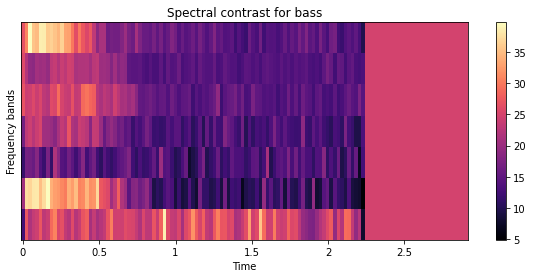

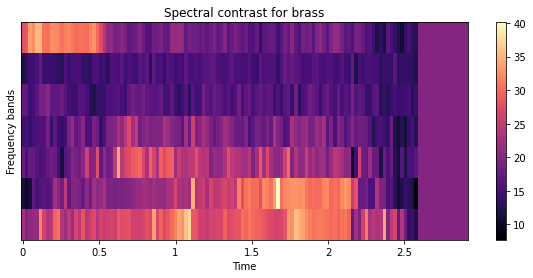

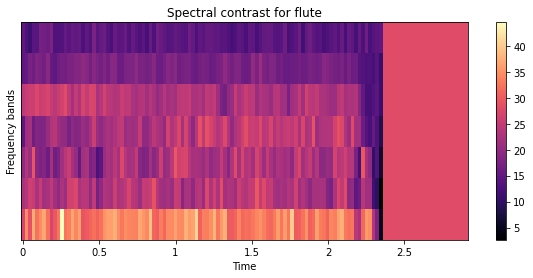

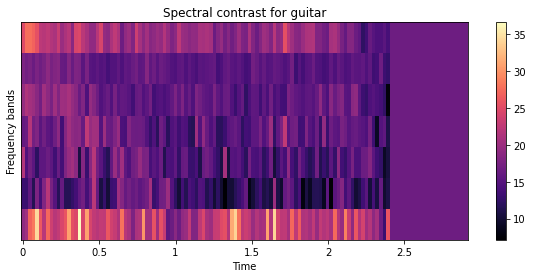

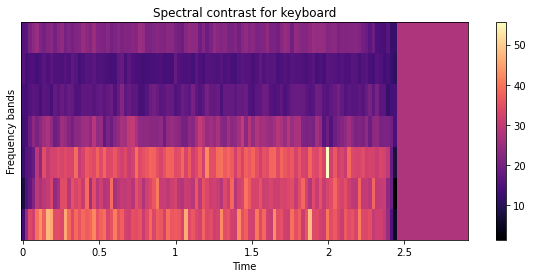

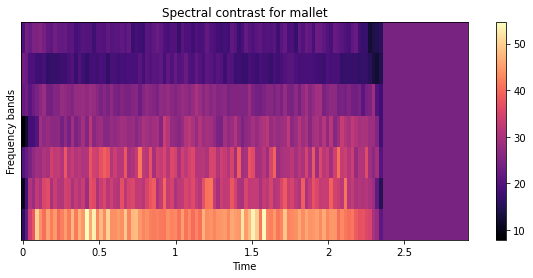

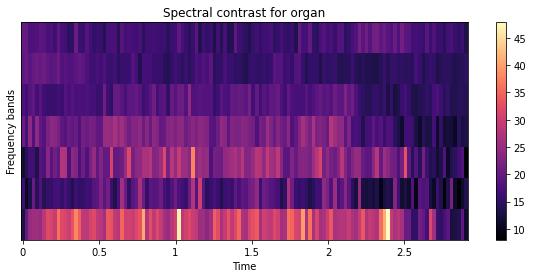

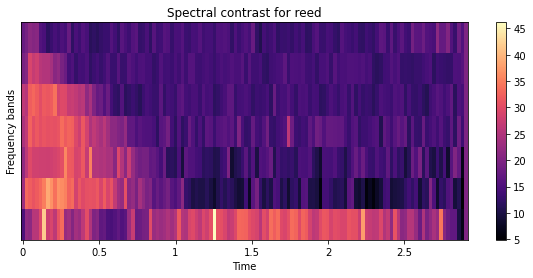

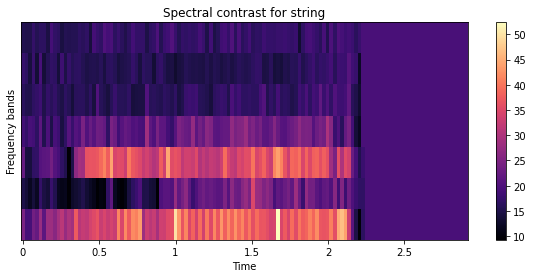

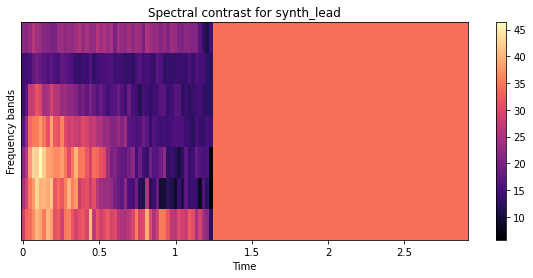

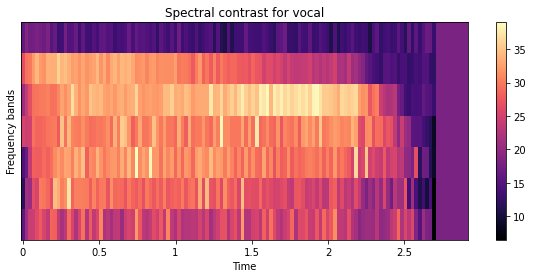

In [22]:
for contrast, instrument, i in zip(contrasts,class_names, range(len(class_names))):
    plt.figure(figsize = (10,4))
    librosa.display.specshow(contrast, x_axis = 'time')
    plt.colorbar()
    plt.ylabel('Frequency bands')
    plt.title('Spectral contrast for '+ instrument)
    #plt.savefig('plots/spectral_contrast_'+str(class_names[i])+'.png')
    
plt.show()

Spectral Rolloff Frequency

In [23]:
rolloffs = []
for y_, sr_ in zip(y, sr):
    rolloffs.append(librosa.feature.spectral_rolloff(y = y_, sr = sr_))

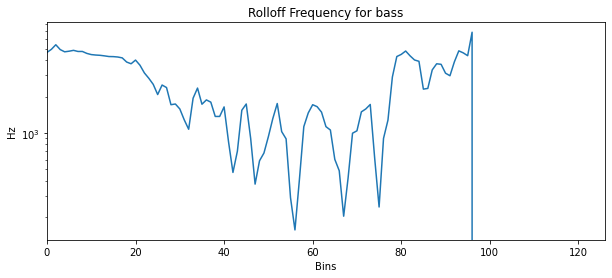

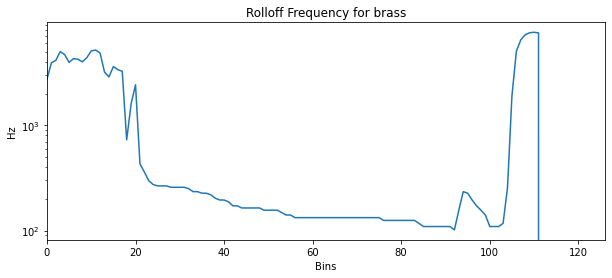

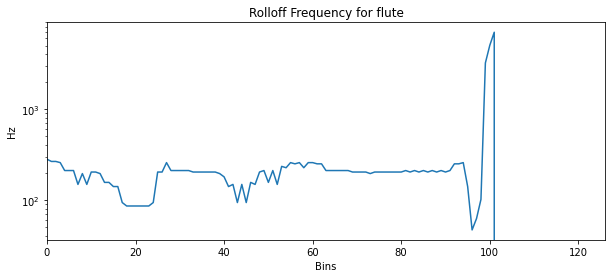

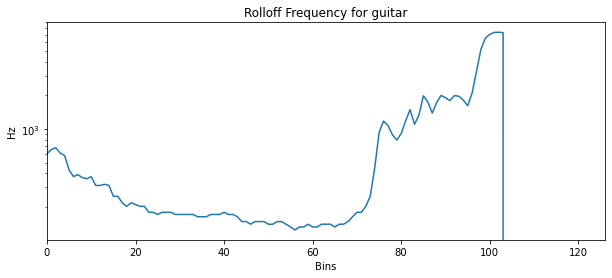

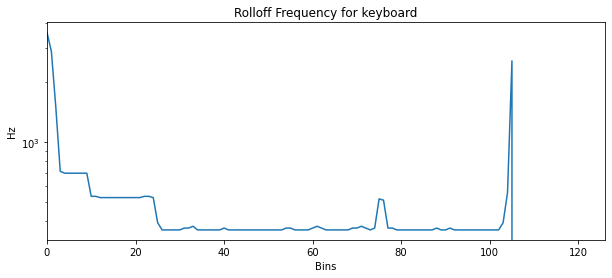

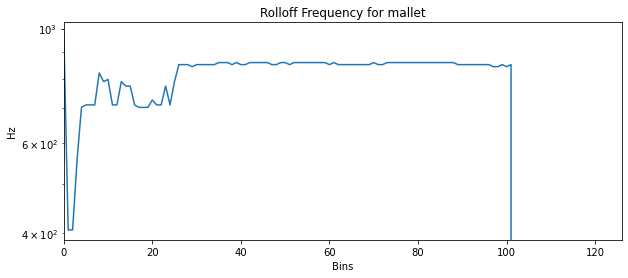

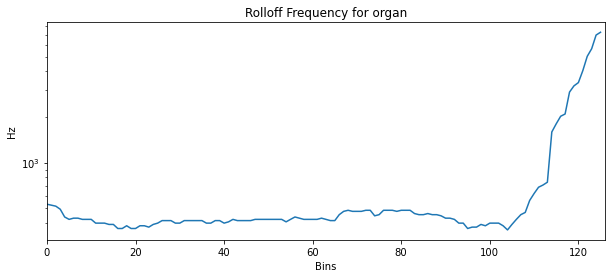

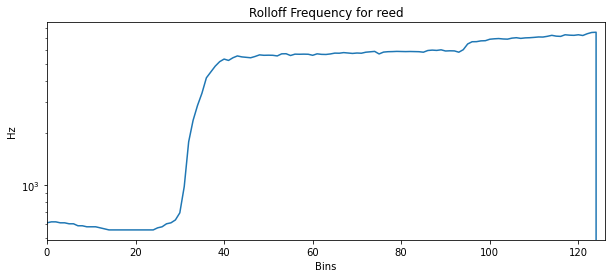

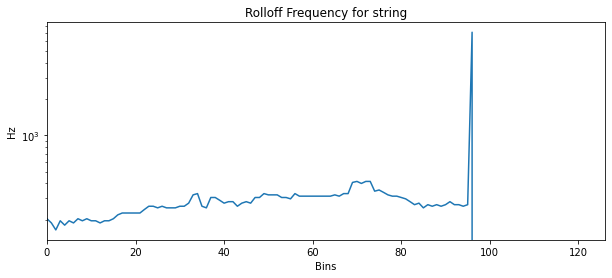

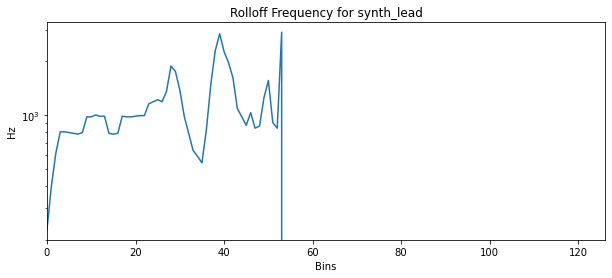

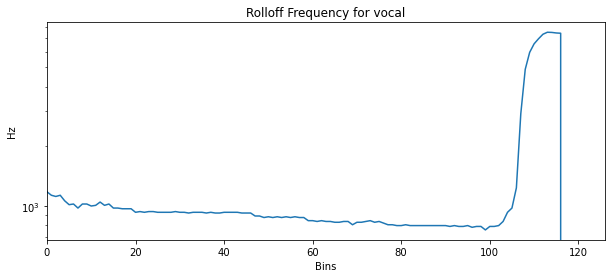

In [24]:
for rolloff, instrument, i in zip(rolloffs,class_names, range(len(class_names))):
    plt.figure(figsize = (10,4))
    plt.semilogy(rolloff.T, label = 'Rolloff frequency for ' + instrument)
    plt.ylabel('Hz')
    plt.xlim([0, rolloff.shape[-1]])
    plt.xlabel('Bins')
    plt.xticks(np.arange(0, rolloff.shape[-1], 20))
    plt.title("Rolloff Frequency for "+ class_names[i])
    #plt.savefig('plots/rolloff_freq'+str(class_names[i])+'.png')


plt.show()

Zero Crossings Rate

In [25]:
z_crossings = []
for y_ in y:
    z = librosa.zero_crossings(y_)
    #Find number of zero crossings
    z_crossings.append(np.sum(z))

In [26]:
zrates = []
for y_ in y:
    zrates.append(librosa.feature.zero_crossing_rate(y = y_))

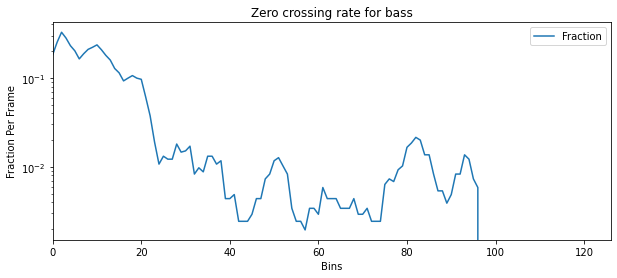

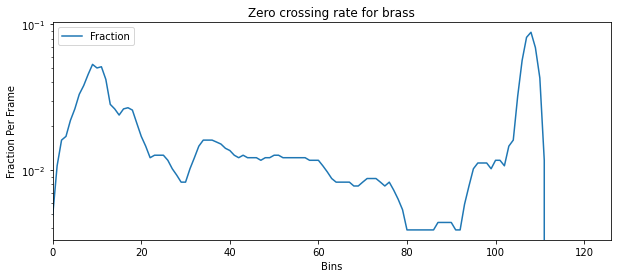

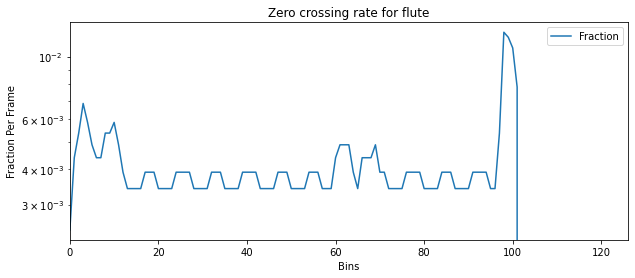

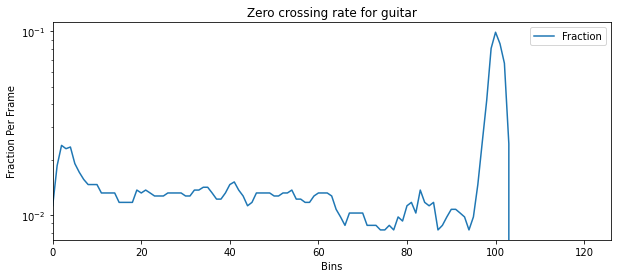

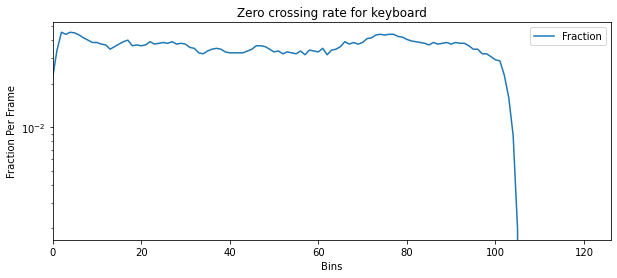

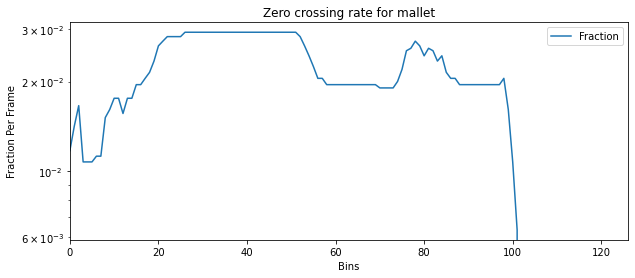

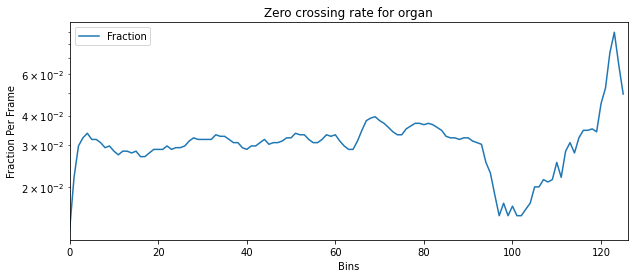

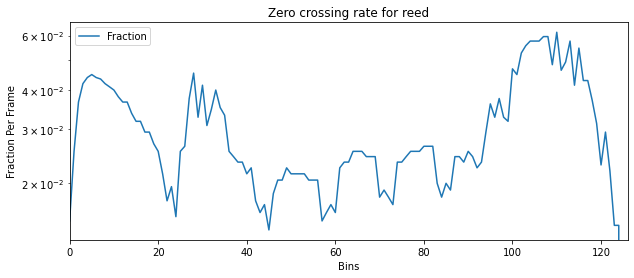

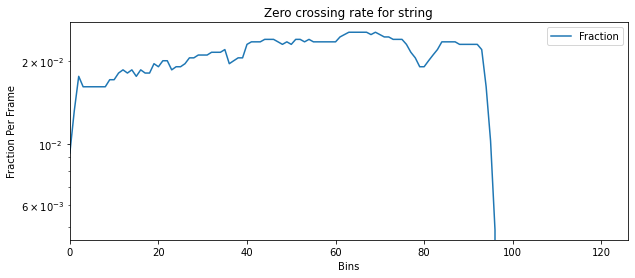

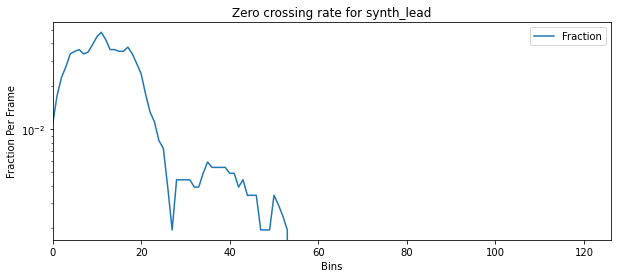

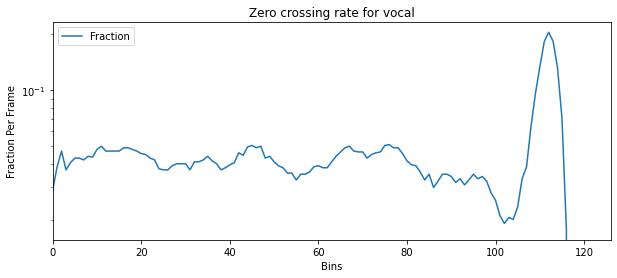

In [27]:
for zrate, instrument, i in zip(zrates,class_names, range(len(class_names))):
    plt.figure(figsize = (10,4))
    plt.semilogy(zrate.T, label = 'Fraction')
    plt.ylabel('Fraction Per Frame')
    plt.xlabel('Bins')
    plt.xticks(np.arange(0, rolloff.shape[-1], 20))
    plt.xlim([0, rolloff.shape[-1]])
    plt.title("Zero crossing rate for " + instrument)
    plt.legend()
    #plt.savefig('plots/zerocross_'+str(class_names[i])+'.png')
    
plt.show()

## Feature Summary

Normalize MFCC

In [28]:
mfcc_means = []
mfcc_stds = []
coefficients = []

for mfcc in mfccs:
    mfcc_means.append(np.mean(mfcc, axis = 1))
    mfcc_stds.append(np.std(mfcc, axis = 1))
    coefficients.append(np.arange(0, mfcc.shape[0]))

In [29]:
custom_palette = ["#8d6db8", "#e67e22", "#5eb95e", "#d45d4d", "#6096e6", "#b58c7c",
                  "#e6a8c9", "#9c9c9c", "#d6cc80", "#5ec6d7", "#9c9c9c", "#ff00ff", "#00ffff"]


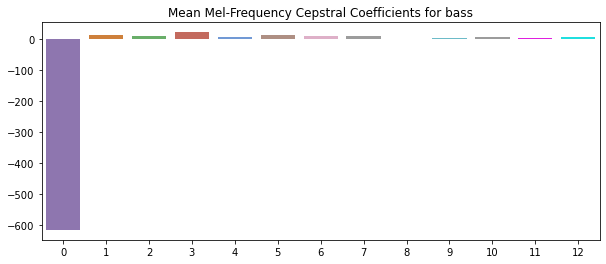

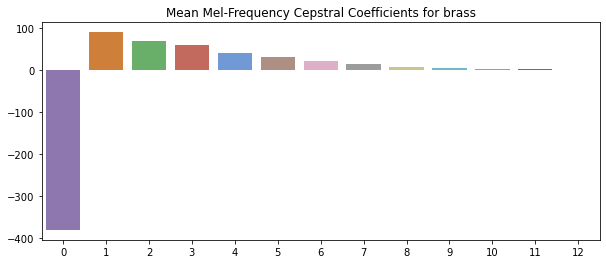

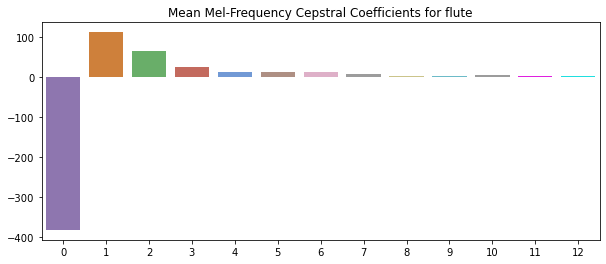

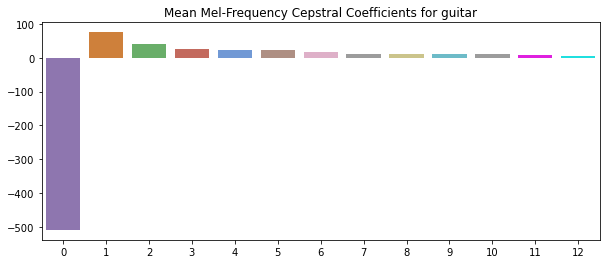

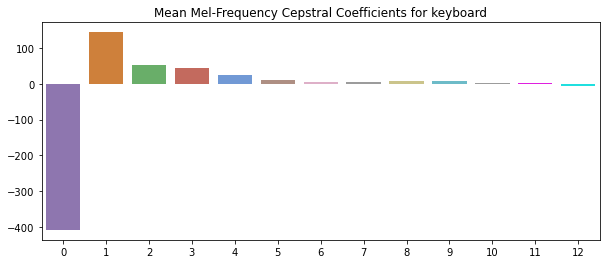

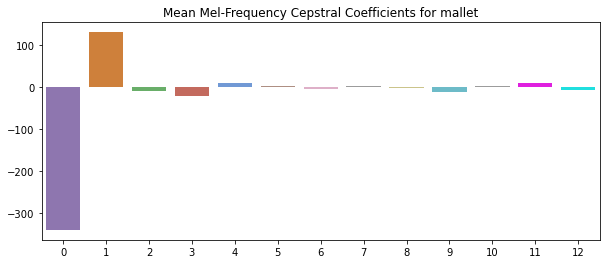

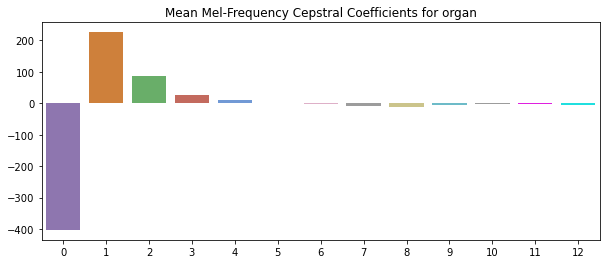

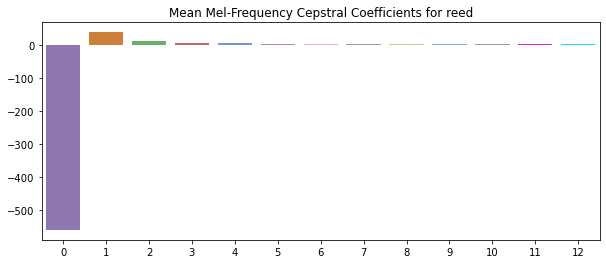

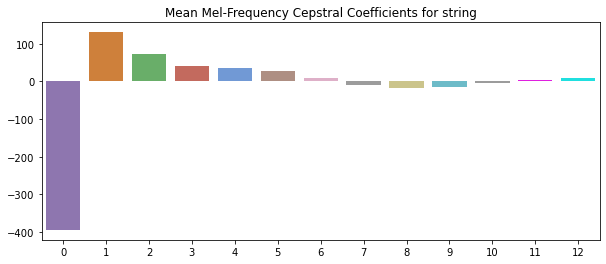

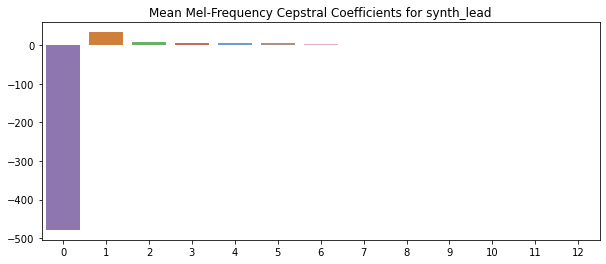

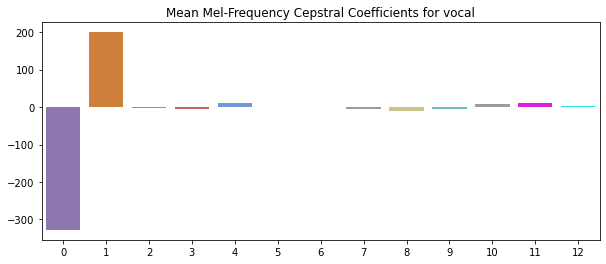

In [30]:
for mfcc_mean, coefficient, instrument in zip(mfcc_means, coefficients, class_names):
    plt.figure(figsize = (10,4))
    plt.title("Mean Mel-Frequency Cepstral Coefficients for " + instrument)
    sns.barplot(x = coefficient, y = mfcc_mean, palette = custom_palette)

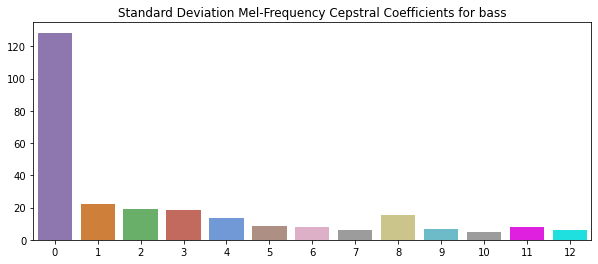

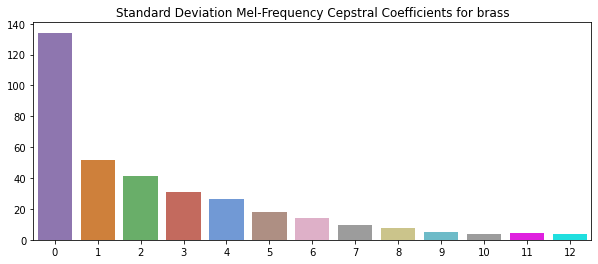

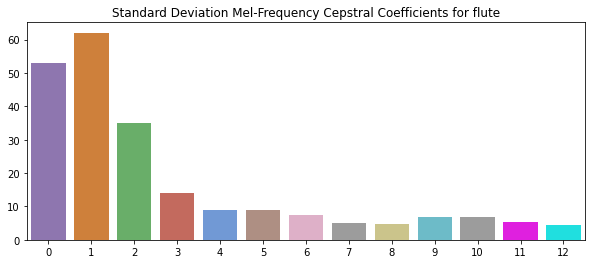

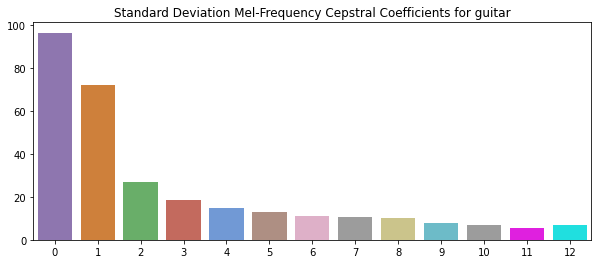

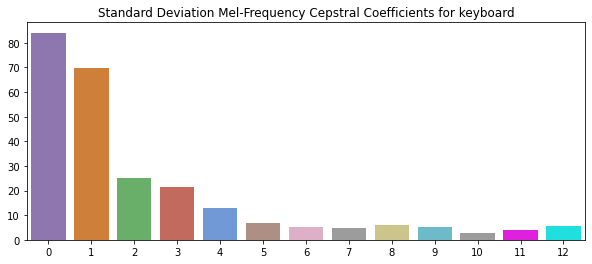

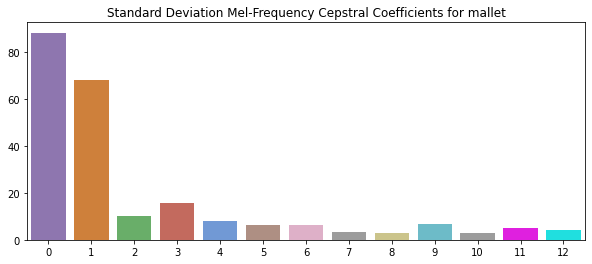

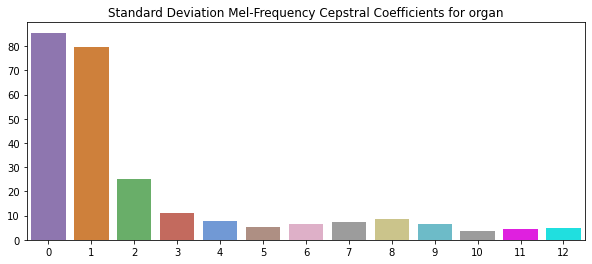

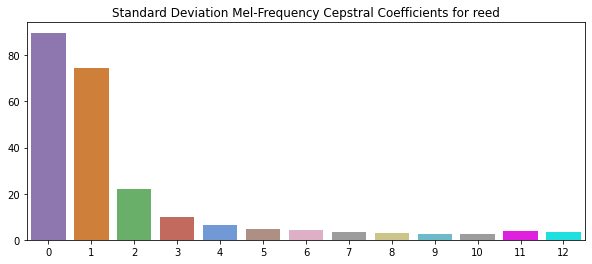

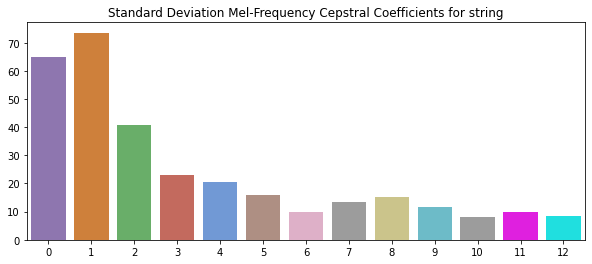

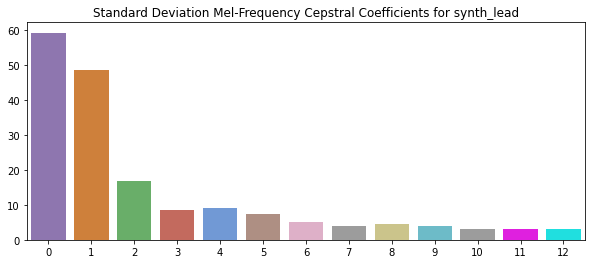

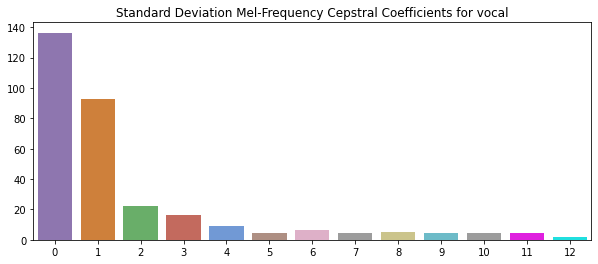

In [31]:
for mfcc_std, coefficient, instrument in zip(mfcc_stds, coefficients, class_names):
    plt.figure(figsize = (10,4))
    plt.title("Standard Deviation Mel-Frequency Cepstral Coefficients for " + instrument)
    sns.barplot(x = coefficient, y = mfcc_std, palette = custom_palette)

Spectral Centroid Summary

In [32]:
centroid_means = []
centroid_stds = []
centroid_skews = []

for i in range(len(centroids)):
    centroid_means.append(np.mean(centroids[i]))
    centroid_stds.append(np.std(centroids[i]))
    centroid_skews.append(scipy.stats.skew(centroids[i], axis = 1)[0])
    print("Centroid mean of {} is {:.3f}".format(class_names[i], centroid_means[i]))
    print("Centroid standard deviation of {} is {:.3f}".format(class_names[i], centroid_stds[i]))
    print("Centroid skewness of {} is {:.3f} \n".format(class_names[i], centroid_skews[i]))

Centroid mean of bass is 952.622
Centroid standard deviation of bass is 898.733
Centroid skewness of bass is 1.179 

Centroid mean of brass is 469.074
Centroid standard deviation of brass is 791.262
Centroid skewness of brass is 2.491 

Centroid mean of flute is 117.836
Centroid standard deviation of flute is 283.285
Centroid skewness of flute is 7.494 

Centroid mean of guitar is 453.122
Centroid standard deviation of guitar is 626.682
Centroid skewness of guitar is 3.585 

Centroid mean of keyboard is 300.958
Centroid standard deviation of keyboard is 210.338
Centroid skewness of keyboard is 2.521 

Centroid mean of mallet is 346.700
Centroid standard deviation of mallet is 169.874
Centroid skewness of mallet is -1.494 

Centroid mean of organ is 429.706
Centroid standard deviation of organ is 442.036
Centroid skewness of organ is 4.468 

Centroid mean of reed is 1541.361
Centroid standard deviation of reed is 808.022
Centroid skewness of reed is -0.219 

Centroid mean of string is 1

Spectral Contrast Summary

In [33]:
contrast_means = []
contrast_stds = []

for C in contrasts:
    contrast_means.append(np.mean(C, axis = 1))
    contrast_stds.append(np.mean(C, axis = 1))

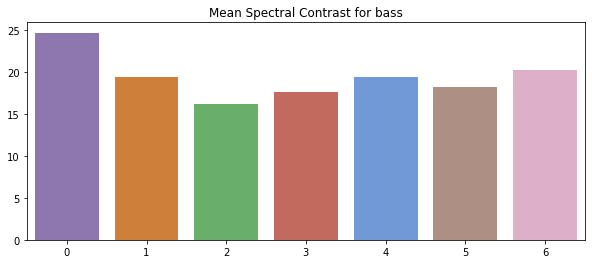

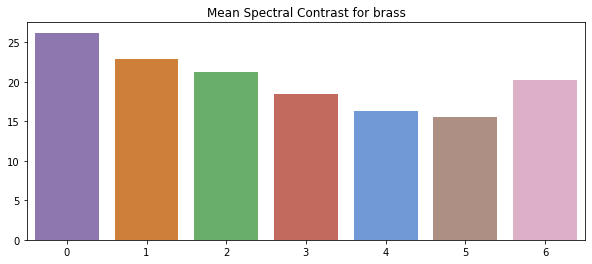

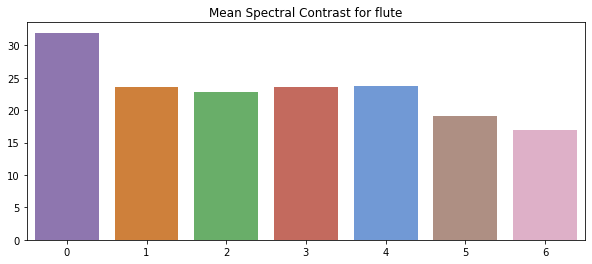

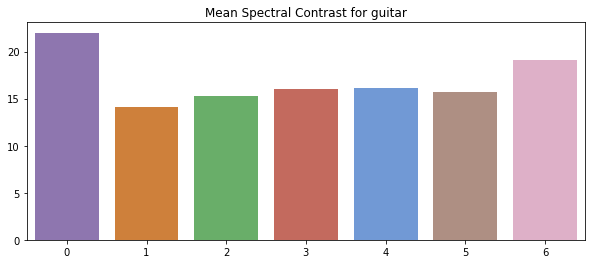

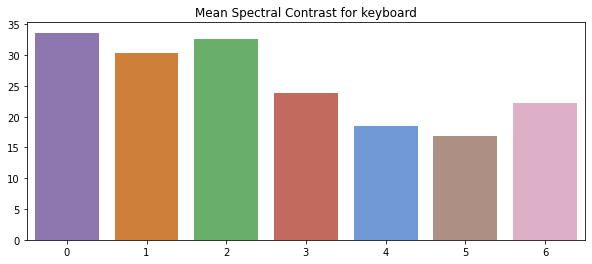

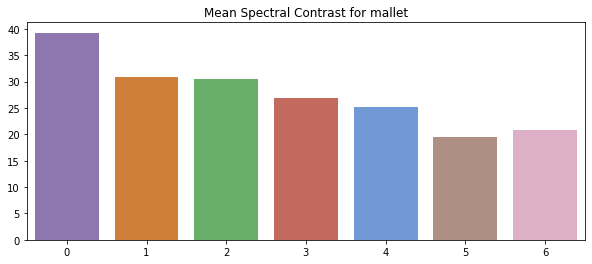

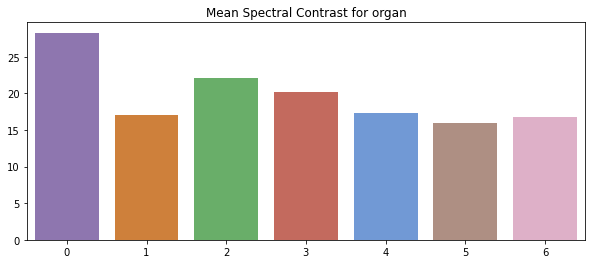

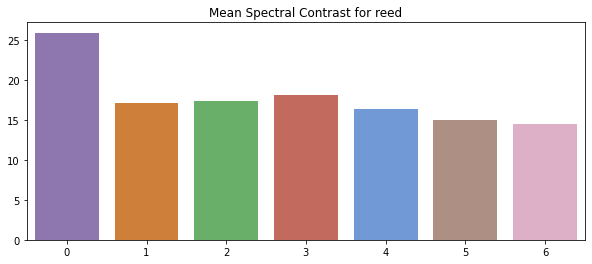

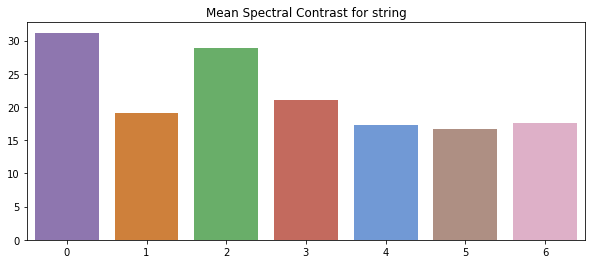

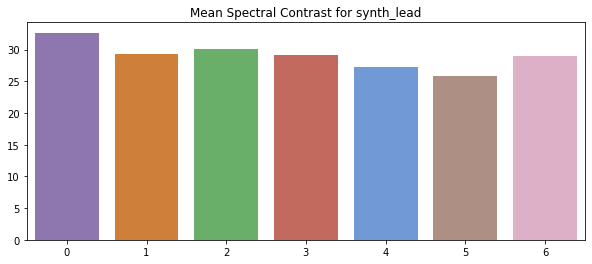

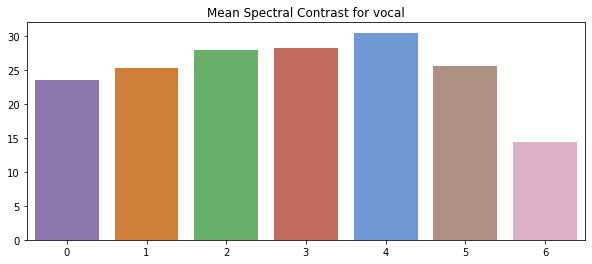

In [34]:
for C, contrast, instrument in zip(contrast_means, contrasts, class_names):
    plt.figure(figsize = (10,4))
    n_constrast = np.arange(0, contrast.shape[0])
    plt.title("Mean Spectral Contrast for " + instrument)
    sns.barplot(x = n_constrast, y = C, palette = custom_palette)

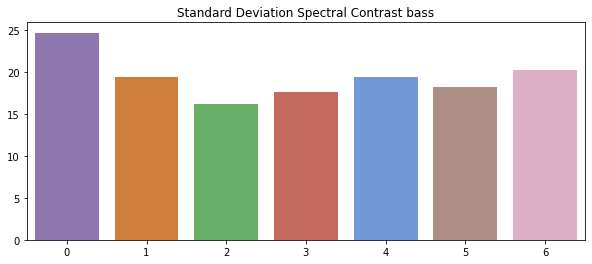

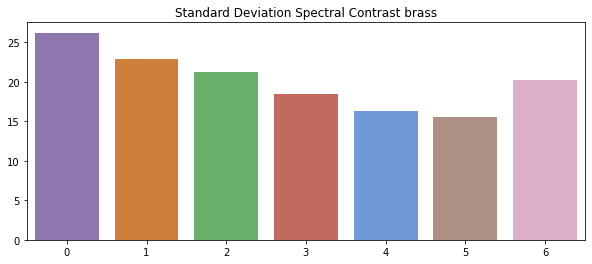

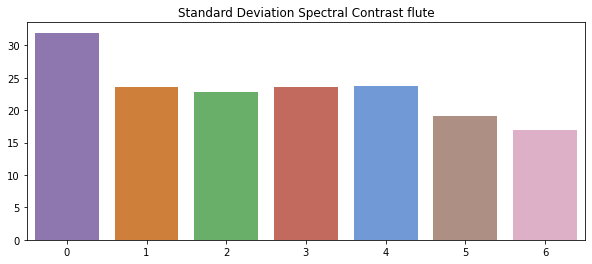

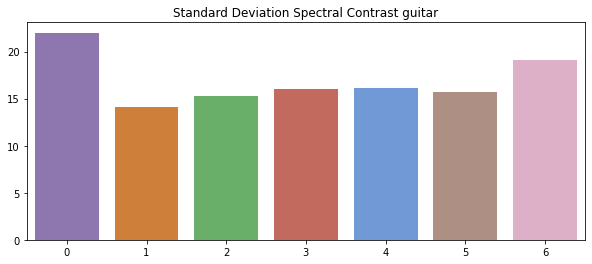

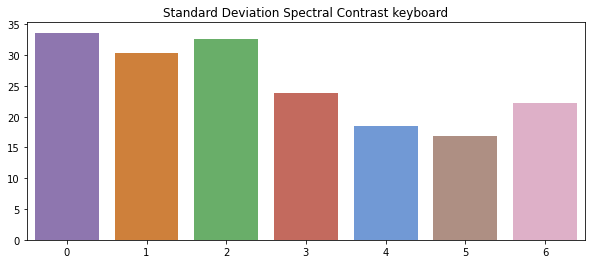

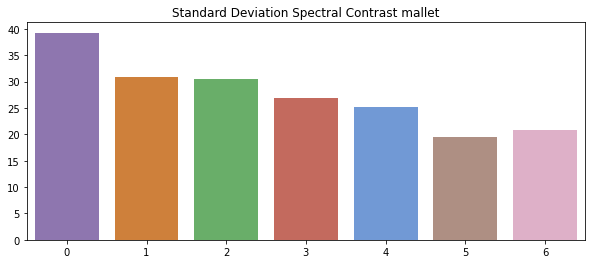

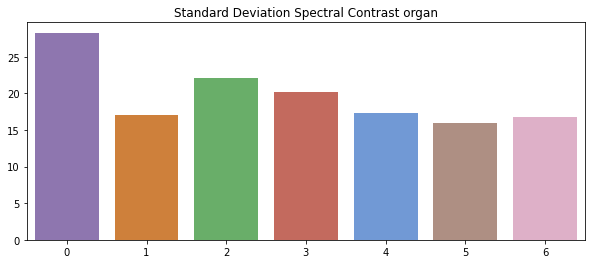

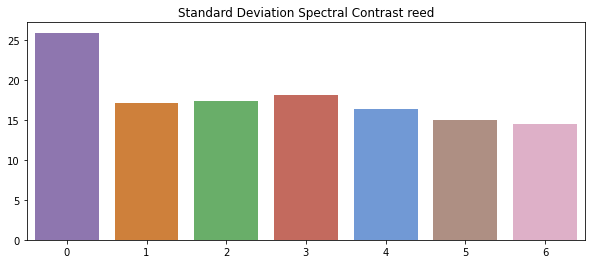

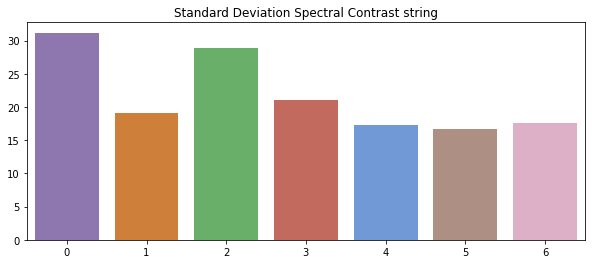

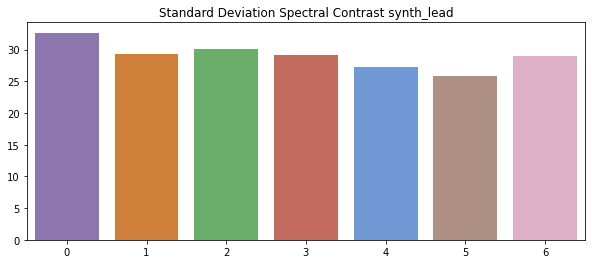

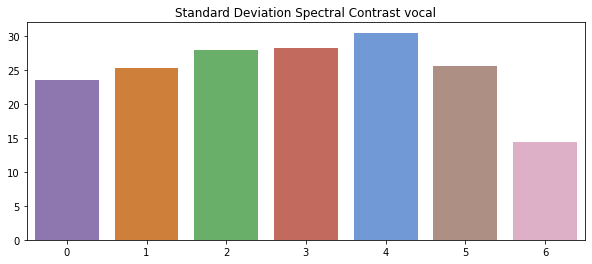

In [35]:
for C, contrast, instrument in zip(contrast_stds, contrasts,class_names):
    plt.figure(figsize=(10,4))
    n_constrast= np.arange(0, contrast.shape[0])
    plt.title("Standard Deviation Spectral Contrast " + instrument)
    sns.barplot(x=n_constrast, y= C, palette=custom_palette)

Spectral Rolloff Summary 

In [36]:
rolloff_means = []
rolloff_stds = []
rolloff_skews = []

for i in range(len(rolloffs)):
    rolloff_means.append(np.mean(rolloffs[i]))
    rolloff_stds.append(np.std(rolloffs[i]))
    rolloff_skews.append(scipy.stats.skew(rolloffs[i], axis = 1)[0])
    print("Rolloff mean of {} is {:.3f}".format(class_names[i], rolloff_means[i]))
    print("Rolloff standard deviation of {} is {:.3f}".format(class_names[i], rolloff_stds[i]))
    print("Rolloff skewness of {} is {:.3f} \n".format(class_names[i], rolloff_skews[i]))

Rolloff mean of bass is 1948.537
Rolloff standard deviation of bass is 1774.806
Rolloff skewness of bass is 0.542 

Rolloff mean of brass is 1071.305
Rolloff standard deviation of brass is 1921.531
Rolloff skewness of brass is 1.963 

Rolloff mean of flute is 270.523
Rolloff standard deviation of flute is 794.221
Rolloff skewness of flute is 6.959 

Rolloff mean of guitar is 746.218
Rolloff standard deviation of guitar is 1489.836
Rolloff skewness of guitar is 3.364 

Rolloff mean of keyboard is 418.775
Rolloff standard deviation of keyboard is 457.137
Rolloff skewness of keyboard is 4.682 

Rolloff mean of mallet is 663.256
Rolloff standard deviation of mallet is 330.423
Rolloff skewness of mallet is -1.419 

Rolloff mean of organ is 759.053
Rolloff standard deviation of organ is 1156.853
Rolloff skewness of organ is 4.035 

Rolloff mean of reed is 4577.629
Rolloff standard deviation of reed is 2542.853
Rolloff skewness of reed is -0.757 

Rolloff mean of string is 266.865
Rolloff sta

Zero Crossing Rate Summary

In [37]:
zrate_means = []
zrate_stds = []
zrate_skews = []

for i in range(len(zrates)):
    zrate_means.append(np.mean(zrates[i]))
    zrate_stds.append(np.std(zrates[i]))
    zrate_skews.append(scipy.stats.skew(zrates[i], axis = 1)[0])
    print("Zero Crossing mean of {} is {:.3f}".format(class_names[i], zrate_means[i]))
    print("Zero Crossing standard deviation of {} is {:.3f}".format(class_names[i], zrate_stds[i]))
    print("Zero Crossing skewness of {} is {:.3f} \n".format(class_names[i], zrate_skews[i]))

Zero Crossing mean of bass is 0.036
Zero Crossing standard deviation of bass is 0.070
Zero Crossing skewness of bass is 2.300 

Zero Crossing mean of brass is 0.015
Zero Crossing standard deviation of brass is 0.015
Zero Crossing skewness of brass is 2.530 

Zero Crossing mean of flute is 0.003
Zero Crossing standard deviation of flute is 0.002
Zero Crossing skewness of flute is 0.807 

Zero Crossing mean of guitar is 0.013
Zero Crossing standard deviation of guitar is 0.014
Zero Crossing skewness of guitar is 3.966 

Zero Crossing mean of keyboard is 0.030
Zero Crossing standard deviation of keyboard is 0.014
Zero Crossing skewness of keyboard is -1.425 

Zero Crossing mean of mallet is 0.018
Zero Crossing standard deviation of mallet is 0.010
Zero Crossing skewness of mallet is -0.740 

Zero Crossing mean of organ is 0.031
Zero Crossing standard deviation of organ is 0.010
Zero Crossing skewness of organ is 2.672 

Zero Crossing mean of reed is 0.030
Zero Crossing standard deviation 